In [43]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

# ***Carlos Emiliano Mendoza Hernández***
# ***317579439***

## ***Problemas***

### ***1.***

Una palabra es monovocálica si tiene solamente una vocal (quizás repetida varias veces), por ejemplo,"casa" solo tiene la 'a'. Se tiene una lista $L$ de $n$ palabras. Para cada vocal, se quiere encontrar su palabra monovocálica más grande en $L$.

**Nota.** A todas las variantes de una vocal (mayúscula, minúscula, acentos, etc.) las consideramos la misma.

**Instancia.** Encontrar las palabras monovocálicas más grandes para cada vocal de la lista en el archivo `espanol.txt`.

#### ***Tipo de problema***:

**Problema.** Encontrar la palabra monovocálicas más grande para cada vocal de la lista. Es un problema de optimizacion, dado que se quiere optimizar (maximizar) el tamaño de la palabra.

#### ***Espacio de estados (análisis):***

El espacio de estados de este problema serían tosas las palabras del archivo de texto. Para comprobar cual es la palabra monovocalica más grande de una vocal en particular, el caso de fuerza bruta consiste en revisar palabra por palabra en el archivo, recorriendo toda su longitud de caracteres. Suponiendo una longitud de palabra promedio de $k$, tardariamos $O(5k \times n)$ ya que se revisaria una vez para cada una de las 5 vocales.

#### ***Mejora:***

Parece complicado disminuir la complejidad del programa; sin emabrgo, hay algunas mejoras que pueden hacerse hoy. Para no recorrer 5 veces la lista, creamos una estructura de datos tipo diccionario para almacenar lasvocales encontradas, de manera que para saber si una palabra es monovocalica,, verificamos que el conjunto dde vocales que la conforma no tenga más de un tipo de letra. El ultimo paso es ir guardando las palabras mas grandes comnforme se van calculando.

#### ***Solución en Python:***

In [44]:
import unicodedata
import numpy as np

def ejercicio1(palabras):
    def normalize(s):
        return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
    def es_monovocalica(palabra):
        vocales_contenidas = {letra for letra in palabra if letra in {'a', 'e', 'i', 'o', 'u'}}
        if len(vocales_contenidas) == 1:
            return True, vocales_contenidas.pop()
        else:
            return False, ''
    maximas = {'a': '', 'e': '', 'i': '', 'o': '', 'u': ''}
    for palabra in palabras:
        palabra = normalize(palabra)
        valor, vocal = es_monovocalica(palabra)
        if valor:
            if len(palabra) > len(maximas[vocal]):
                maximas[vocal] = palabra
    return maximas

#### ***Ejecución de la instancia:***

In [45]:
palabras = []
with open("espanol.txt", 'r', encoding='cp1252') as file:
    for line in file:
        palabra = line.strip()
        if palabra.endswith(' subj'):
            palabra = palabra[:-5]
        palabras.append(palabra)

palabras = ejercicio1(palabras)
print(palabras)

{'a': 'chabancanadas', 'e': 'efervescentes', 'i': 'infringir', 'o': 'bochornosos', 'u': 'dumdum'}


### ***2.***

En un cuadrado de $n \times n$ dividido en cuadraditos de $1 \times 1$ se ha colocado un punto rojo en algunos de sus cuadraditos. ¿Se podrá elegir uno de los subcuadrados de $4 \times 4$ que no tenga ningún punto rojo?

![Figura 1](img/Figura1.png "Ejemplo del problema 2")

Por ejemplo, en la Figura 1, del lado izquierdo hay un acomodo de puntos rojos en el que no se puede poner ningún cuadrado de $4 \times 4$ sin puntos rojos, pero en el de la derecha sí se puede poner al cuadrado sombreado en verde.

**Instancia.** Considera el tablero de $100 \times 100$ en donde el cuadradito $(i,j)$ es el que está en la fila $i$ y columna $j$. Pondremos un punto rojo en $(i,j)$ si $i+j$ es un número primo. Resuelve el problema para este caso. Interpreta tu respuesta.

#### ***Tipo de problema***:

**Problema.** ¿Se podrá elegir uno de los subcuadrados de $4 \times 4$ que no tenga ningún punto rojo?
La pregunta se responde con un "sí" o "no", por lo tanto es un problema de decisión.

#### ***Espacio de estados (análisis):***

**Entrada.** Un entero positivo $n$ y una lista de tuplas $(i,j)$ que representan cuadritos de $1\times 1$ en la fila $i$ y columna $j$.

**Salida.** Un booleano, `True` si es posible tener algún cuadro de $4 \times 4$ en el tablero, o `False` en caso contrario.

Notamos que, si fijamos la esquina inferior derecha del cuadrado verde, podemos revisar un cuadrado de $4 \times 4$ tomando los 3 cuadritos anteriores de esa fila y los 3 anteriores de esa columna. 

En otras palabras, para revisar si el cuadrado verde cabe poniendo la esquina inferior derecha en $(i,j)$, en realidad podemos revisar 
el cuadrado verde formado por los cuadritos $(i,j), (i-1,j), (i-2,j), (i-3,j),(i,j-1),...,(i-3,j-3)$.

Entonces, para verificar todas las posibilidades del tablero, tenemos que poner la esquina verde en $(n-3)(n-3)$ posiciones y revisar que no tenga puntos rojos en alguna de esas coordenadas. Esto significa que, tenemos $(n-3)(n-3)$ cuadrados verdes posibles.

Por otra parte, para saber que no hay cuadritos rojos dentro de algún cuadrado verde, necesitamos inspeccionar cada una de sus 16 celdas.

La complejidad sería $O((n-3)\times(n-3)\times 16)=O((n-3)^2) = O(n^2)$. 


#### ***Mejora:***

Podemos disminuir las operaciones para revisar si un cuadro de $4 \times 4$ tiene puntos rojos adentro. Para ello usaremos una matriz adicional para almacenar los puntos rojos acumulados hasta cierta coordenada, i.e., si la entrada $(i,j)$ de la matriz acumulada es igual a $r$, quiere decir que en el subcuadro que se forma con las esquinas $(0,0), (0,j), (i,0), (i,j)$ tiene $r$ puntos rojos adentro.

Ahora, para calcular la matriz de puntos rojos acumulados, usamos ***programación dinámica***.

Creamos una matriz de puntos rojos acumulados de tamano $(n+1)(n+1)$ (esto para evitar indices negativos). La matriz se construye como:

`pr_acumulados[i][j] = pr_acumulados[i-1][j] + pr_acumulados[i][j-1] - pr_acumulados[i-1][j-1] + tablero[i-1][j-1]`

Conforme vamos calculando la matriz de acumulados, verificamos si ya encontramos un cuadrado sin puntos rojos, y en ese caso, terminar la ejecución.

Para saber si un cuadro de $4 \times 4$ tiene puntos rojos, basta con revisar que no hayan incrementos de $(i-4,j-4)$ a $(i,j-4)$ ni de $(i,j)$ a $(i-4,j)$, así, la verificación se reduce a:

`pr_acumulados[i-4][j-4] - pr_acumulados[i][j-4] + pr_acumulados[i][j] - pr_acumulados[i-4][j] == 0`

Si la verificación se cumple, entonces ese cuadro de $4 \times 4$ no tiene puntos rojos adentro, y termina la ejecución.

La complejidad sigue siendo $O(n^2)$ pues, en el peor caso, se calcula toda la matriz de acumulados. El cálculo de la matriz de acumulados toma tiempo $O(n^2)$, sin embargo, se reduce el tiempo de revisar si el cuadro tiene puntos rojos adentro, ya que, con fuerza bruta, las revisiones son independientes para cada cuadro, y en programación dinámica, los resultados anteriores se reutilzan para revisar el siguiente cuadrado y disminuyen las operaciones.

#### ***Solución en Python:***

In [46]:
def crear_tablero(n, pr):
    tablero = [[0] * n for _ in range(n)]
    for i,j in pr:
        tablero[i][j] = 1
    return tablero

def ejercicio2(n, pr):
    tablero = crear_tablero(n, pr)
    pr_acumulados = [[0] * (n + 1) for _ in range(n + 1)]
    for i in range(1,n+1):
        for j in range(1,n+1):
            pr_acumulados[i][j] = pr_acumulados[i-1][j] + pr_acumulados[i][j-1] - pr_acumulados[i-1][j-1] + tablero[i-1][j-1]
            if i >= 4 and j >= 4:
                pr_adentro = pr_acumulados[i-4][j-4] - pr_acumulados[i][j-4] + pr_acumulados[i][j] - pr_acumulados[i-4][j]
                if pr_adentro == 0:
                    return True, i-4, j-4
    return False, -1, -1

#### ***Ejecución de la instancia:***

In [47]:
# Funcion para determinar si un numero es primo
def es_primo(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

In [48]:
# Crear lista de pares de primos
pares_primos = []
for i in range(100):
    for j in range(100):
        if es_primo(i + j):
            pares_primos.append((i, j))
# Crear tablero
tablero = crear_tablero(100, pares_primos)

Se encontro un cuadrado de 4x4 sin puntos rojos adentro en la posicion (0, 90)


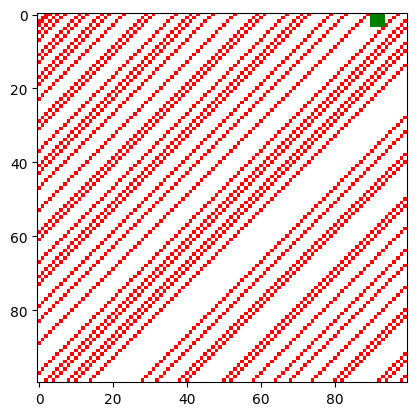

In [49]:
# Mostrar resultado
res, i, j = ejercicio2(100, pares_primos)
if res:
    print(f"Se encontro un cuadrado de 4x4 sin puntos rojos adentro en la posicion ({i}, {j})")
else:
    print("No se encontro un cuadrado de 4x4 sin puntos rojos adentro")

tablero = np.array(tablero)
tablero[i:i+4, j:j+4] = 2
color_map = {0: 'white', 1: 'red', 2: 'green'}
plt.imshow(tablero, cmap=colors.ListedColormap([color_map[i] for i in color_map]))
plt.show()

### ***3.***

Una *subpalabra* de una palabra *P* consiste de tomar algunas letras de *P* de izquierda a derecha, no necesariamente de manera consecutiva. Por ejemplo, la palabra *casa* tiene las 13 subpalabras *c, a, s, ca, cs, as, aa, sa, cas, caa, csa, asa, casa*. No tiene como subpalabra a *sc*, pues estas letras no aparecen en ese orden en *casa*. La palabra vacía nunca cuenta. Dada una palabra con *n* letras, ¿cuántas subpalabras tiene?

**Instancia.** ¿Cuántas subpalabras tiene la siguiente palabra?

$$\text{tabagatabaagatabagbataab}$$

#### ***Tipo de problema***:

**Problema.** Dada una palabra con *n* letras, ¿cuántas subpalabras tiene? Es un problema de conteo pues nos pide una cantidad.

#### ***Espacio de estados (análisis):***

Una subpalabra corresponde a cualquier subsecuencia no vacía de la palabra. Una subsecuencia se forma seleccionando un subconjunto de las letras de $P$
en el orden en que aparecen.

Cada letra tiene dos opciones: ser incluida o no ser incluida en una subsecuencia. Por tanto, para $n$ letras, hay $2^n$ combinaciones posibles (incluyendo la subsecuencia vacía). Como la subsecuencia vacía no cuenta como una subpalabra, el número total de subpalabras es $2^n-1$


#### ***Mejora:***

Podemos evitar generar todas las combinaciones posibles, teniendo en cuenta las posiciones relativos de los elementos. Nos interesan las subsecuencias que son combinaciones que mantienen el orden original de los elementos.

Podemos usar backtrack para generar las subsecuencias:
- La función `generar_subsecuencias()` se llama recursivamednte, agregando o no cada letra a la subsecuencia en cada paso, para generar todas las posibles subsecuencias. A medida que explroamos cada combinación, almacenamos las subsecuencias únicas en un conjunto, esto asegura que no se guarden duplicados.

1. Si no se ha pasado un conjunto de subsecuencias, lo inicializamos como un conjunto vacío. Este conjunto almacenará las subsecuencias únicas que vamos a generar.

2. Cuando hemos procesado todas las letras de la palabra (es decir, cuando $i$ alcanza la longitud de la palabra), verificamos si la subsecuencia construida (subsecuencia) no está vacía. Si no está vacía, la agregamos al conjunto subsecuencias. Luego, devolvemos el conjunto subsecuencias, que contiene todas las subsecuencias únicas generadas hasta el momento.

3. Llamamos recursivamente a la función `generar_subsecuencias` avanzando al siguiente índice $i+1$ y concatenando la letra actual de la palabra a la subsecuencia.

4. Llamamos recursivamente a la función `generar_subsecuencias`, pero sin concatenar la letra actual de la palabra a la subsecuencia (es decir, la dejamos fuera de la subsecuencia).

Al hacer estas dos llamadas recursivas (incluir y excluir), exploramos todas las posibles subsecuencias generadas a partir de las letras de la palabra, respetando el orden original de las letras.

Sin embargo, la complejidad sigue siendo $O(2^n)$ en el peor caso. La mejora consiste en no generar todas las subsecuencias explícitamente, haciendo un poco más eficiente la ejecución.

#### ***Solución en Python:***

In [50]:
def ejercicio3(palabra):
    def generar_subsecuencias(palabra, i=0, subsecuencia="", subsecuencias=None):
        if subsecuencias is None:
            subsecuencias = set()
        if i == len(palabra):
            if subsecuencia:
                subsecuencias.add(subsecuencia)
            return subsecuencias
        generar_subsecuencias(palabra, i+1, subsecuencia + palabra[i], subsecuencias)
        generar_subsecuencias(palabra, i+1, subsecuencia, subsecuencias)
        return subsecuencias
    subsecuencias = generar_subsecuencias(palabra)
    return len(subsecuencias)

#### ***Ejecución de la instancia:***

In [51]:
palabra = "tabagatabaagatabagbataab"
resultado = ejercicio3(palabra)
print(f"El número de subpalabras únicas de '{palabra}' es: {resultado}")

El número de subpalabras únicas de 'tabagatabaagatabagbataab' es: 1797059


### ***4.***

Se tienen $n$ números enteros alrededor de un círculo, quizás algunos de ellos negativos. Diseña un algoritmo que encuentre cuál es el arco consecutivo de números consecutivos cuya suma sea mayor.

**Instancia.** Resuelve el problema para la Figura 2. Por ejemplo,

$$9, -9, 30, -31, -14, 7, -5$$

son números que están en un arco consecutivo de números.

![Figura 2](img/Figura2.png "Ejemplo del problema 4")

#### ***Tipo de problema***:

**Problema.** Encontrar el arco consecutivo de números cuya suma sea mayor. Es un problema de optimización.

#### ***Espacio de estados (análisis):***

**Entrada.** Un número entero $n$ que es la cantidad de números en el círculo y una lista $C$ de números enteros (positivos y negativos).

**Salida.** Una lista de números consecutivos en el círculo (no necesariamente también en $C$) con la máxima suma posible.

Como los números están en un círculo, cada arco consecutivo puede empezar en cualquier posición y extenderse a cualquier otra posición. El espacio de estados consiste en todas las posibles combinaciones de subarcos consecutivos para sumar sus valores y guardar la mayor encontrada.

Para resolver el problema de la contigüidad del primero con el último elemento de la lista, duplicamos $C$ y la concatenamos al final de ella misma. Así, para cada posición $i$ en la $C$ original, tomamos subarreglos consecutivos que empiezan en $i$ y tienen longitud de máximo $n$. 

Notamos que recorrer el espacio de estados toma tiempo $O(n^2)$, ya que se reocrren $n$ indices de $C$ y para cada uno de ellos se calcula la suma de hasta $n$ elementos. La suma toma $O(n)$, por lo tanto, verificar todas las sumas toma tiempo $O(n^3)$

#### ***Mejora:***

Aplicaremos la técnica de ***Divide y vencerás***. Podemos dividir el arreglo en dos mitades, resolver cada mitad de manera recursiva y luego combinar los resultados de las mitades. Sin embargo, al combinar las soluciones debemos considerar las tres posibilidades:

1. El subarreglo con suma máxima está completamente en la mitad izquierda.
2. El subarreglo con suma máxima está completamente en la mitad derecha.
3. El subarreglo de suma máxima tiene elementos de ambas mitades.

Entonces, los pasos a seguir son:

1. Dividir el arreglo $C$ en dos mitades.
2. Resolver el problema para cada mitad recursivamente.
3. Combinar los resultados:
    - Calcular la suma máxima en ambas mitades.
    - Calcular la suma máxima en subarreglos que se extienden desde el final de la mitad izquierda hasta el comienzo de la mitad derecha.
    - Considerar el caso circular.

Para ello se crearon las siguientes funciones auxiliares:

- `suma_maxima_cruzada(arr, izq, med, der)`: Calcula la suma máxima de un subarreglo que cruza el punto medio y devuelve la suma y los índices de inicio y fin de este sub arreglo. Sirve como funcion auxiliar para la siguiente funcion, ya que tambien es necesario verificar los sub arreglos que cruzan la mitad entre los arreglos al unirlos.

- `suma_maxima_subarreglo(arr, izq, der)`: Divide el arreglo a la mitad, calcula las sumas máximas para ambas mitades con recursión, y la suma máxima cruzada. Devuelve la suma máxima y los índices correspondientes.

La función de la solución completa se describe de la siguiente manera:

1. Encontramos el subarreglo con suma máxima, considerando únicamente las posibilidades lineales.

    `max_lineal, inicio_lineal, fin_lineal = suma_maxima_subarreglo(C, 0, n - 1)`

2. Revisamos los casos circulares. Para ello, es conveniente invertir los signos de $C$ de tal manera que podamos usar la función `suma_maxima_subarreglo()` para encontrar el subarreglo intermedio menos valioso. Así, de la suma de todos los elementos del arreglo, podemos restar ese segmento menos valioso para obtener la suma máxima circular.

    Notemos que si `max_circular == 0`, entonces todos los números de $C$ son negativos, y por lo tanto, encontramos el "negativo menos negativo" en el paso anterior y lo devolvemos.

    Si no, devolvemos el mayor de la suma lineal y la suma circular.

Ahora analicemos la complejidad:

1. `suma_maxima_cruzada`: Se hace un unico barrido al arreglo, $O(n)$.

2. `suma_maxima_subarreglo`: El arreglo se divide en dos mitades recursivamente hasta que cada mitad tiene solo un elemento. Al combinar el resultado de cada mitad, se calcula la suma máxima que cruza la mitad entre ambas mitades ($O(n)$). Por el teorema maestro: 

$$T(n) = 2T(\frac{n}{2}) + O(n) \rightarrow T(n) = O(n \log n)$$

3. **Solución completa**:

    - Calcular la suma máxima lineal: $O(n \log n)$
    - Calcular la suma total del arreglo: $O(n)$
    - Calcular la suma menos valiosa del arreglo invertido: $O(n \log n)$

    Por lo tanto, la complejidad esta acotada por $O(n \log n)$

#### ***Solución en Python:***

In [52]:
def ejercicio4(C):
    def suma_maxima_cruzada(arr, izq, med, der):
        suma_izq = -float('inf')
        total = 0
        max_izq = med
        for i in range(med, izq - 1, -1):
            total += arr[i]
            if total > suma_izq:
                suma_izq = total
                max_izq = i
        suma_der = -float('inf')
        total = 0
        max_der = med + 1
        for i in range(med + 1, der + 1):
            total += arr[i]
            if total > suma_der:
                suma_der = total
                max_der = i
        return suma_izq + suma_der, max_izq, max_der

    def suma_maxima_subarreglo(arr, izq, der):
        if izq == der:
            return arr[izq], izq, der
        med = (izq + der) // 2
        max_izq, inicio_izq, fin_izq = suma_maxima_subarreglo(arr, izq, med)
        max_der, inicio_der, fin_der = suma_maxima_subarreglo(arr, med + 1, der)
        max_cruz, inicio_cruz, fin_cruz = suma_maxima_cruzada(arr, izq, med, der)
        if max(max_izq, max_der, max_cruz) == max_izq:
            return max_izq, inicio_izq, fin_izq
        elif max(max_izq, max_der, max_cruz) == max_der:
            return max_der, inicio_der, fin_der
        return max_cruz, inicio_cruz, fin_cruz

    n = len(C)
    max_lineal, inicio_lineal, fin_lineal = suma_maxima_subarreglo(C, 0, n - 1)
    total = sum(C)
    C_neg = [-x for x in C]
    min_invertido, inicio_invertido, fin_invertido = suma_maxima_subarreglo(C_neg, 0, n - 1)
    max_circular = total + min_invertido
    if max_circular == 0:
        return max_lineal, C[inicio_lineal:fin_lineal + 1]
    if max_lineal > max_circular:
        return max_lineal, C[inicio_lineal:fin_lineal + 1]
    return max_circular, C[fin_invertido + 1:] + C[:inicio_invertido]

#### ***Ejecución de la instancia:***

In [53]:
C = [-6, 44, 40, -34, 44, 2, 6, -10, 9, -9, 30, -31, -14, 7, -5, 36, 27, 40, -34, -42, -34, -48, 42, -34, 0, -44, 0 -38, 49]
maximo, subarreglo = ejercicio4(C)
print(f"La suma maxima es {maximo} y el subarreglo es {subarreglo}")

La suma maxima es 225 y el subarreglo es [49, -6, 44, 40, -34, 44, 2, 6, -10, 9, -9, 30, -31, -14, 7, -5, 36, 27, 40]


![Figura 2_2](img/Figura2_2.png "Ejemplo del problema 4")

### ***5.***

Nos dan una lista $L$ en donde cada elemento es una pareja `(persona, numero entero)`. En total hay $n$ parejas. Las personas, números e incluso parejas se pueden repetir. Queremos de aquí extraer otra lista $M$ que sólo aparezcan para cada persona, las 3 parejas con el mayor número entero (si hay menos de 3 queremos todas). La lista $M$ debe respetar el orden de $L$. En caso de que haya empate en una pareja, debe aparecer la que sale primero en $L$. Por ejemplo, si la lista es:

$$L=[(A,5), (B,2), (B,1), (A,5), (A,8), (C,0), (C,4), (D,1), (B,9), (B,0), (A,8)]$$

Los números de las $A$ de mayor a menor son $8,8,5,5...,$ así que el top 3 es $8,8,5$. Aunque el $(A,5)$ aparece dos veces, nos quedamos con su primera aparición. Como los $C$ sólo tienen dos parejas, aparecen ambas, y algo similar para los $D$. El $(B,0)$ no aparece porque para las $B$ el top 3 es $2,1,9$. Ya elegidas para las parejas que se quedan, debemos ponerlas en el orden que tenían en $L$.

Debemos dar como respuesta entonces

$$M=[(A,5), (B,2), (B,1), (A,8), (C,0), (C,4), (D,1), (B,9), (A,8)]$$

**Instancia.**

$$L = [(A, 5),(C, 1),(E, 8),(E, 9),(E, 2),(D, 5),(B, 4),(E, 5),$$
$$(E, 8),(C, 3),(B, 9),(B, 0),(C, 9),(C, 1),(E, 5),(B, 7),$$
$$(A, 7),(F, 1),(B, 7),(B, 1),(E, 8),(F, 3),(E, 6),(E, 2),$$
$$(C, 8),(F, 0),(F, 1),(E, 0),(D, 3),(A, 0),(B, 3),(A, 5),$$
$$(D, 3),(C, 2),(B, 3),(E, 7),(F, 1),(D, 3),(B, 8),(C, 6),$$
$$(D, 1),(C, 0),(F, 4),(A, 6),(F, 7),(E, 7),(D, 8),(B, 8)]$$

#### ***Tipo de problema***:

Se trata de un problema de optimización, dado que se busca mantener los 3 valores más altos de cada persona conservando el orden de aparición original.

#### ***Espacio de estados (análisis):***

El espacio de estados es el conjunto de todas las posibles combinaciones de elementos que se pueden seleccionar de la lista $L$ para cumplir con la restricción de que, para cada persona, se eligen como máximo 3 elementos.

Para cada persona, si esa persona aparece $k$ veces en la lista, podemos seleccionar hasta 3 elementos entre esos $k$. El número de combinaciones posibles de elementos para esa persona esta dado por $$\text{min}(3,k)$$

Dado que esta operación se realiza independientemente para cada persona, el espacio de estados total es el producto de las combinaciones possibles para todas las personas. Así el espacio de estados es de tamano

$$\prod_{i=1}^p \binom{k_i}{\text{min}(3,k_i)}$$

donde $\binom{k_i}{\text{min}(3,k_i)}$ representa las combinaciones de cada $k_i$ persona tomando no mas de 3 elementos elegidos.

#### ***Mejora:***

Primero ordenamos los pares, considerando tanto la persona como el valor, y los guardamos en una lista.

Ahora, en un diccionario, `pares`, iteramos sobre los pares ordenados. Para cada elemento de la lista de prdenados, si la persona no esta aun en el diccionario, se inicializa una lista con el indice actual. Si por el contrario, la persona ya esta en el diccionario y su lisya tiene menos de 3 indices, se agrega el indice a la lista. De esta manera, el diccionario `pares` contiene los indices de los primeros tres elementos (en el orden especificado) asociados a cada persona.

Por ultimo, nos aseguramos de devolver una lista en la que solo esten aquellos elementos cuyos indices esten presentes en alguna lista del diccionario.

Analizando la complejidad, el ordenamiento de las personas y su clave toma tiempo $O(n \log n)$

El siguiente paso de recorrer la lista de ordenados toma $O(n)$ ya que solo se hace un barrido sobre la lista.

El utlimo paso consiste en filtrar la lista que se devuelve. Dado que el bucle recorre $n$ elementos y cada uno tiene solo una clave su complejidad es $O(n)$.

Entonces, la complejidad de todo el algoritmo esta acotada por $O(n \log n)$

#### ***Solución en Python:***

In [54]:
def ejercicio5(L):
    pares = {}
    ordenados = sorted(enumerate(L), key=lambda x: (x[1][0], x[1][1]), reverse=True)
    for i, (persona, _) in ordenados:
        if persona not in pares:
            pares[persona] = [i]
        elif len(pares[persona]) < 3:
            pares[persona].append(i)
    result_list = [pair for i, pair in enumerate(L) if any(i in pares[key] for key in pares)]
    return result_list

#### ***Ejecución de la instancia:***

In [55]:
L = [('A', 5), ('C', 1), ('E', 8), ('E', 9), ('E', 2), ('D', 5), ('B', 4),
     ('E', 5), ('E', 8), ('C', 3), ('B', 9), ('B', 0), ('C', 9), ('C', 1),
     ('E', 5), ('B', 7), ('A', 7), ('F', 1), ('B', 7), ('B', 1), ('E', 8),
     ('F', 3), ('E', 6), ('E', 2), ('C', 8), ('F', 0), ('F', 1), ('E', 0),
     ('D', 3), ('A', 0), ('B', 3), ('A', 5), ('D', 3), ('C', 2), ('B', 3),
     ('E', 7), ('F', 1), ('D', 3), ('B', 8), ('C', 6), ('D', 1), ('C', 0),
     ('F', 4), ('A', 6), ('F', 7), ('E', 7), ('D', 8), ('B', 8)]
resultado = ejercicio5(L)
for par in resultado:
    print(par)

('A', 5)
('E', 8)
('E', 9)
('D', 5)
('E', 8)
('B', 9)
('C', 9)
('A', 7)
('F', 3)
('C', 8)
('D', 3)
('B', 8)
('C', 6)
('F', 4)
('A', 6)
('F', 7)
('D', 8)
('B', 8)


### ***6.***

Se quiere saber cuál es el mejor valor de $k$ de 1 a $n$ para maximizar
las siguientes funciones, y para dicho valor que maximiza, la evaluación
correspondiente.

- $f(k) = \sin(1) + 2 \sin(2) + 3 \sin(3) + ... + k \sin(k)$, donde $\sin$ se evalúa en radianes.
- $h(k) = \sin(1) + 2 \sin(\frac{1}{2}) + 3 \sin(\frac{1}{3}) + ... + k \sin(\frac{1}{k})$, donde $\sin$ se evalúa en radianes.

**Instancia.** Resuelve el problema para $n=10^6$

#### ***Tipo de problema***:

Es un problema de optimizacion, pues se busca el valor de $n$ que proporcione el valor maximo al evaluar la funcion.

#### ***Espacio de estados (análisis):***

Podemos usar un ciclo para iterar desde $k=1$ hasta $n$, calculando los valores acumulados para ambas funciones en cada paso. Durante el calculo, se actualiza el valor maximo obtenido hasta el momento y la $k$ asociada correspondiente.

Esto tomaria un tiempo de $O(n)$.

#### ***Mejora:***

Puede demostrarse que la funcion $h(k)$ es estrictamente creciente, lo cual significa que el valor maximo de $h(k)$ es $n$, sin embargo, para calcular el valor de la funcion, se debe realizar la suma desde $1$ hasta $n$. De cualquier manera se necesita un tiempo $O(n)$

#### ***Solución en Python:***

In [56]:
import math
def max_f_k(n):
    max_f = -float('inf')
    max_k_f = 0
    f_value = 0
    for k in range(1, n + 1):
        f_value += k * math.sin(k)
        if f_value > max_f:
            max_f = f_value
            max_k_f = k
    return max_f, max_k_f

def max_h_k(n):
    max_h = -float('inf')
    max_k_h = 0
    h_value = 0
    for k in range(1, n + 1):
        h_value += k * math.sin(1 / k)
        if h_value > max_h:
            max_h = h_value
            max_k_h = k
    return max_h, max_k_h

#### ***Ejecución de la instancia:***

In [57]:
max_k_f, max_f = max_f_k(10**6)
print(f"El valor de k que maximiza f(k) es {max_f}, con un valor máximo de f(k) = {max_k_f}")

max_k_h, max_h = max_h_k(10**6)
print(f"El valor de k que maximiza h(k) es {max_h}, con un valor máximo de h(k) = {max_k_h}")

El valor de k que maximiza f(k) es 999959, con un valor máximo de f(k) = 1042724.3855426998
El valor de k que maximiza h(k) es 1000000, con un valor máximo de h(k) = 999999.7346658106


### ***7.***

Una cuadrícula de $2 \times n$ representa un laboratorio de cómputo. Con un cuadrado negro indicamos que la computadora de ese lugar está descompuesta y no se puede usar. Con uno blanco que sí se puede usar. Queremos meter a 6 estudiantes en ese salón. Pero, además, como hay una pandemia suelta, dos estudiantes no pueden quedar en cuadrados que compartan arista. Dados los cuadrados de computadoras descompuestas, ¿de cuántas
formas se puede colocar a los estudiantes?

Por ejemplo, en la Figura 3, arriba tenemos un posible salón. En esa misma
figura, abajo en verde se indica una manera de colocar a 6 estudiantes.

![Figura 3](img/Figura3.png "Ejemplo de salon 2 x 8")

**Instancia.** La de la figura 4.

![Figura 4](img/Figura4.png "Instancia para resolver")

#### ***Tipo de problema***:

Se trata de un problema de enumeraciómn, pues se trata de contar de cuantas maneras diferentes podemos sentar a los alumnos en el salon de clases.

#### ***Espacio de estados (análisis):***

Un espacio de estados con fuerza bruta sería hacer todas las combinaciones en la cuadricula de $2\times n$ y filtrar aquellas configuraciones que no cumplan la restriccion. Una celda puede bien estar o no estar ocupada, por lo tanto, el numero de combinaciones en el problema es $2^{2 \times n}$, por lo que recorrer este espacio de estados tomaria tiempo $O(2^{n})$ (el filtrado de cuadriculas invalidas solo requiere tiempo $O(n)$).

#### ***Mejora:***

Una mejor forma de recorrer las configuraciones del salon es con backtracking. Podemos recortar muchas operaciones si terminamos de generar conbinaciones una vez que hayamos colocado a todos los estudiantes en algun lugar valido. Para ello hacemos lo siguiente:

1. `esta_libre`: Esta funcion revisa si es posible poner a un estudiante en un lugar dado, i.e. que no tiene otro estudiante adyacente y que este vacio el lugar.

2. `backtrack`: Explora recursivamente todas las configuraciones posibles, y toma una decision en funcion de lo siguiente:
    - Colocar un estudiante en el lugar. Para ello la celda no debe estar bloqueada ni tener otros estudiantes adyacentes (`esta_libre`). En este caso se marca la celda como ocupada y se explora el siguiente lugar usando recursion. Despues de explorar esta rama, se vuelve a marcar el lugar como no ocupado para permitir otras exploraciones en este lugar.
    - No colocar a un estudiante. Esto sucede cuando `esta_libre` es False. para esta situacion, pasamos al siguiente lugar sin contar esta.


En el peor caso seguimos teniendo complejidad $O(2^n)$, puesto que se harian todas las combinaciones posbibles de lugares. Sin embargo, el backtracking evita explorar configuraciones inválidas. Si el lugar no esta libre, no se sigue explorando esa rama, o, si ya se han colocado más estudiantes de los necesarios, la rama se descarta.

#### ***Solución en Python:***

In [58]:
def ejercicio7(salon, estudiantes=6):
    filas, cols = 2, len(salon[0])
    direcciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    ocupadas = [[False] * cols for _ in range(filas)]
    configuraciones = 0
    def esta_libre(f, c):
        if salon[f][c] == 0 or ocupadas[f][c]:
            return False
        for df, dc in direcciones:
            nf, nc = f + df, c + dc
            if 0 <= nf < filas and 0 <= nc < cols and ocupadas[nf][nc]:
                return False
        return True

    def backtrack(f, c, colocados):
        nonlocal configuraciones
        if colocados == estudiantes:
            configuraciones += 1
            return
        if f == filas:
            return
        sig_f, sig_c = (f, c+1) if c+1 < cols else (f+1, 0)
        backtrack(sig_f, sig_c, colocados)
        if esta_libre(f, c):
            ocupadas[f][c] = True
            backtrack(sig_f, sig_c, colocados+1)
            ocupadas[f][c] = False
    backtrack(0, 0, 0)
    return configuraciones

#### ***Ejecución de la instancia:***

In [59]:
salon = [
    [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
]
print(ejercicio7(salon))

13033


### ***8.***

Se tiene un **cubo**. Un acomodo **bueno** consiste en poner sobre sus vértices 8 números distintos del 1 al $n$. Un acomodo es **muy bueno** si la suma de los números en cada cara del cubo es la misma para todas las caras. Da todos los acomodos muy buenos.

**Instancia.** Resolver el problema para $n=15$.

#### ***Tipo de problema***:

**Problema.** Dar todos los acomodos muy buenos. Es un problema de enumeración.

#### ***Espacio de estados (análisis):***

**Entrada.** $n$, donde el rango de números a considerar va desde $1,...,n$

**Salida.** Una lista de listas con todos los acomodos muy buenos (cada acomodo es de tamaño 8).

El espacio de estados consiste de todos los muestreos posibles de 8 números, de $n$ en total; esto es, todos los acomodos **buenos** (no necesariamente también **muy buenos**).

Para representar los vértices del cubo, hacemos un mapeo de los índices del posible acomodo con las posiciones de los vértices del cubo. Queda de la siguiente manera:

- Cara 1: vértices $[0,1,2,3]$
- Cara 2: vértices $[0,2,4,6]$
- Cara 3: vértices $[1,3,5,7]$
- Cara 4: vértices $[4,5,6,7]$
- Cara 5: vértices $[2,3,6,7]$
- Cara 6: vértices $[0,1,4,5]$

Para ello, se necesitarían $^nP_8 = \frac{n!}{(n-8)!} \approx O(n^8)$ verificaciones, donde todas las sumas de vértices de cada cara deben ser iguales.

Para que un acomodo sea **muy bueno** se debe cumplir que

`sum(Cara 1) == sum(Cara 2) == sum(Cara 3) == sum(Cara 4) == sum(Cara 5) == sum(Cara 6)`

Las sumas y comparaciones se hacen en tiempo constante.

Por lo tanto, el espacio de estados toma tiempo $O(n^8)$

#### ***Mejora:***

Luce complicado obtener mejoras o una complejidad menor que la antes mencionada. Se continuo el problema con brute force

#### ***Solución en Python:***

In [60]:
from itertools import combinations, permutations

In [61]:
def ejercicio8(n):
    numeros = list(range(1, n+1))
    count = 0
    with open("ejercicio8.txt", "w") as f:
        for combinacion in combinations(numeros, 8):
            for permutacion in permutations(combinacion):
                v0, v1, v2, v3, v4, v5, v6, v7 = permutacion
                cara_1 = v0 + v1 + v2 + v3
                cara_2 = v0 + v2 + v4 + v6
                cara_3 = v1 + v3 + v5 + v7
                cara_4 = v4 + v5 + v6 + v7
                cara_5 = v2 + v3 + v6 + v7
                cara_6 = v0 + v1 + v4 + v5
                if (cara_1 == cara_2 == cara_3 == cara_4 == cara_5 == cara_6):
                    f.write(f"[{v0}, {v1}, {v2}, {v3}, {v4}, {v5}, {v6}, {v7}]\n")
                    count += 1
    return count

#### ***Ejecución de la instancia:***

In [62]:
n = 15
acomodos_muy_buenos = ejercicio8(n)
print("Número de acomodos muy buenos encontrados:", acomodos_muy_buenos)

Número de acomodos muy buenos encontrados: 53616
